In [95]:
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class Staker(object):
    GNO =0
    isLocked= False
    LockedInDays = 0
    LockingDate=0
    WIZ=0
    lastWIZWithdraw=0
    IssueRate=0

    # The class "constructor" - It's actually an initializer 
    def __init__(self, GNO):
        self.GNO = GNO
    
    def withdrawWIZ(self,today):
        if today>self.lastWIZWithdraw and self.isLocked:
            SupplyWIZ[today]+=(today-self.lastWIZWithdraw)*self.IssueRate
            self.lastWIZWithdraw=today
        
    def checkUnlock(self, today):
        self.withdrawWIZ(today)
        if today>self.LockingDate+self.LockedInDays and self.isLocked:
                LockedGNO[today]-=self.GNO
                self.LockedInDays=0
                self.isLocked= False
                return True;
        return False;    
        
    def lockGNO(self, today):
        global LockedGNOAtStart
        global LockedGNO
        self.checkUnlock(today)
        if not self.isLocked:
            ir=max(0,((CurrentFeesInWIZ[today]+CurrentFeesInETH[today])*12*min(1,CurrentFeesInETH[today]/CurrentFeesInWIZ[today])-SupplyWIZ[today])/30)
            r=random.random()
            if r>0.5:# and ir>(CurrentFeesInWIZ[today])/30: 
                LockedGNOAtStart=max(0,LockedGNOAtStart-self.GNO)
                SupplyWIZ[today]+=ir*self.GNO/(self.GNO+LockedGNO[today]+LockedGNOAtStart)*30*1/3
                self.IssueRate=ir*self.GNO/(self.GNO+LockedGNO[today]+LockedGNOAtStart)*2/3
                self.LockedInDays=30
                self.lastWIZWithdraw=today
                self.LockingDate=today
                self.isLocked=True
                LockedGNO[today]+=self.GNO
            
## plotting only
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()
    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time (days)')
    ax1.set_ylabel('WIZ supply')
    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('ratio ETH/WIZ of collected fees')
    return ax1, ax2

# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None



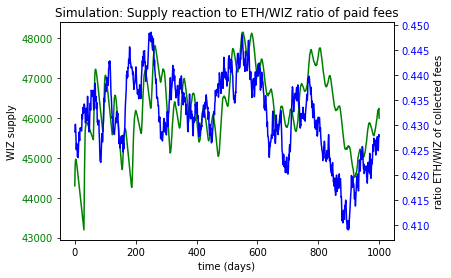

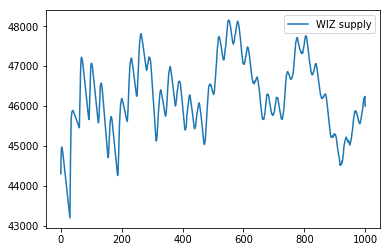

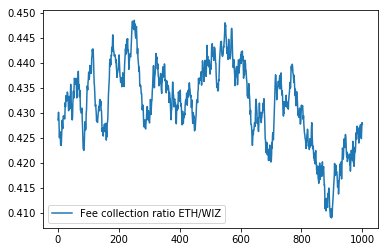

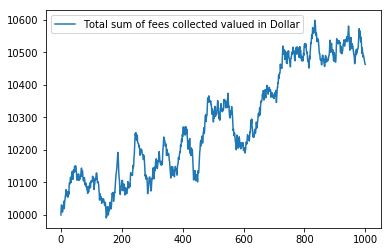

In [97]:

NrParticipants=500;
Participants=[]
SupplyGNO=1000000000;
CurrentFeesCollected=[10000]
NR_OF_DAYS=1000

LockedGNO=[0]
LockedGNOAtStart=SupplyGNO;
CurrentFeesInWIZ=[7000]
CurrentFeesInETH=[3000]
CurrentFeesCollected=[10000]
SupplyWIZ=[CurrentFeesCollected[0]*43/10]
def adjustFees(CurrentDay):
        CurrentFeesInWIZ.append(CurrentFeesInWIZ[CurrentDay]+((random.random()-1/2)*30))
        if CurrentFeesInWIZ[CurrentDay+1]<0:
            CurrentFeesInWIZ[CurrentDay+1]=1
    
        CurrentFeesInETH.append(CurrentFeesInETH[CurrentDay]+((random.random()-1/2)*30))
        if CurrentFeesInETH[CurrentDay+1]<0:
            CurrentFeesInETH[CurrentDay+1]=1
            
    
            
for i in range(NrParticipants):
     Participants.append( Staker(SupplyGNO/NrParticipants))
    

for CurrentDay in range(NR_OF_DAYS):
    
    for p in Participants:
            p.withdrawWIZ(CurrentDay)
            p.lockGNO(CurrentDay)
    adjustFees(CurrentDay)
    CurrentFeesCollected.append(CurrentFeesInWIZ[CurrentDay+1]+CurrentFeesInETH[CurrentDay+1])   
    SupplyWIZ.append(SupplyWIZ[CurrentDay]-CurrentFeesInWIZ[CurrentDay]/30)
    if SupplyWIZ[CurrentDay+1]<0:
        SupplyWIZ[CurrentDay+1]=1
    LockedGNO.append(LockedGNO[CurrentDay])
    
# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, range(NR_OF_DAYS+1), SupplyWIZ, np.array(CurrentFeesInETH, dtype=np.float)/np.array(CurrentFeesInWIZ, dtype=np.float), 'g', 'b')
color_y_axis(ax1, 'g')
color_y_axis(ax2, 'b')
plt.title('Simulation: Supply reaction to ETH/WIZ ratio of paid fees')
plt.show()    
plt.plot(range(NR_OF_DAYS+1),SupplyWIZ, label='WIZ supply')  
plt.legend()
plt.show()
plt.plot(range(NR_OF_DAYS+1),np.array(CurrentFeesInETH, dtype=np.float)/np.array(CurrentFeesInWIZ, dtype=np.float), label='Fee collection ratio ETH/WIZ') 
plt.legend()
plt.show()
plt.plot(range(NR_OF_DAYS+1),CurrentFeesCollected, label='Total sum of fees collected valued in Dollar') 
plt.legend()
plt.show()    

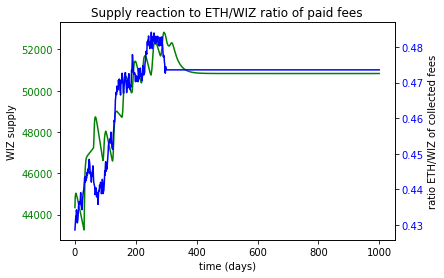

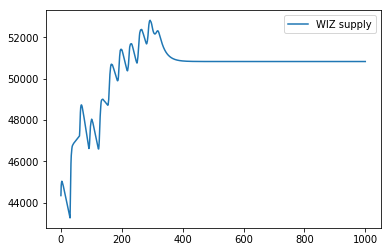

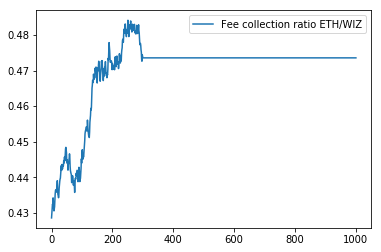

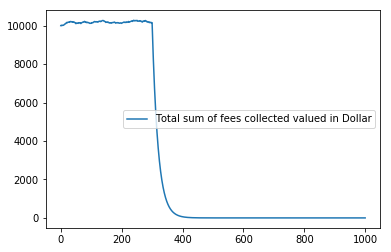

In [104]:
#Current fee consumption drop in ETH and WI
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

NrParticipants=500;
Participants=[]
SupplyGNO=1000000000;
CurrentFeesCollected=[10000]
NR_OF_DAYS=1000

LockedGNO=[0]
LockedGNOAtStart=SupplyGNO;
CurrentFeesInWIZ=[7000]
CurrentFeesInETH=[3000]
CurrentFeesCollected=[10000]
SupplyWIZ=[CurrentFeesCollected[0]*43/10]
    
def adjustFees(CurrentDay):
    if CurrentDay <300:    
        CurrentFeesInWIZ.append(CurrentFeesInWIZ[CurrentDay]+((random.random()-1/2)*30))
        if CurrentFeesInWIZ[CurrentDay+1]<0:
            CurrentFeesInWIZ[CurrentDay+1]=1
    
        CurrentFeesInETH.append(CurrentFeesInETH[CurrentDay]+((random.random()-1/2)*30))
        if CurrentFeesInETH[CurrentDay+1]<0:
            CurrentFeesInETH[CurrentDay+1]=1
    else:
        CurrentFeesInWIZ.append(CurrentFeesInWIZ[CurrentDay]*0.95)
        if CurrentFeesInWIZ[CurrentDay+1]<0:
            CurrentFeesInWIZ[CurrentDay+1]=1
    
        CurrentFeesInETH.append(CurrentFeesInETH[CurrentDay]*0.95)
        if CurrentFeesInETH[CurrentDay+1]<0:
            CurrentFeesInETH[CurrentDay+1]=1
    
          
            
for i in range(NrParticipants):
     Participants.append( Staker(SupplyGNO/NrParticipants))
    

for CurrentDay in range(NR_OF_DAYS):
    
    for p in Participants:
            p.withdrawWIZ(CurrentDay)
            p.lockGNO(CurrentDay)
    adjustFees(CurrentDay)
    CurrentFeesCollected.append(CurrentFeesInWIZ[CurrentDay+1]+CurrentFeesInETH[CurrentDay+1])   
    SupplyWIZ.append(SupplyWIZ[CurrentDay]-CurrentFeesInWIZ[CurrentDay]/30)
    if SupplyWIZ[CurrentDay+1]<0:
        SupplyWIZ[CurrentDay+1]=1
    LockedGNO.append(LockedGNO[CurrentDay])
    
# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, range(NR_OF_DAYS+1), SupplyWIZ, np.array(CurrentFeesInETH, dtype=np.float)/np.array(CurrentFeesInWIZ, dtype=np.float), 'g', 'b')
color_y_axis(ax1, 'g')
color_y_axis(ax2, 'b')
plt.title('Supply reaction to ETH/WIZ ratio of paid fees')
plt.show()    
plt.plot(range(NR_OF_DAYS+1),SupplyWIZ, label='WIZ supply')  
plt.legend()
plt.show()
plt.plot(range(NR_OF_DAYS+1),np.array(CurrentFeesInETH, dtype=np.float)/np.array(CurrentFeesInWIZ, dtype=np.float), label='Fee collection ratio ETH/WIZ') 
plt.legend()
plt.show()
plt.plot(range(NR_OF_DAYS+1),CurrentFeesCollected, label='Total sum of fees collected valued in Dollar') 
plt.legend()
plt.show()    
            

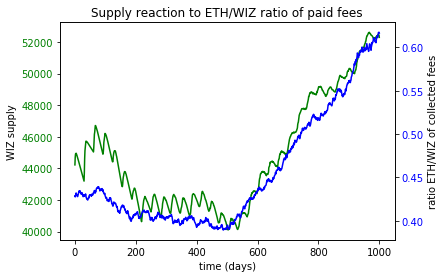

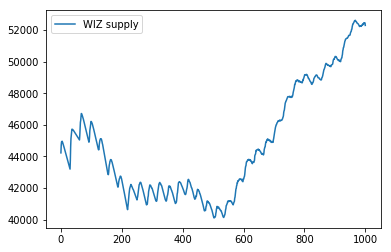

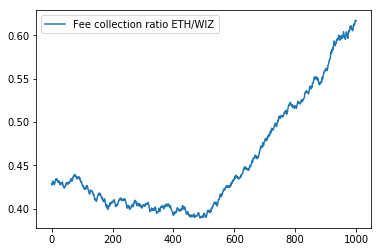

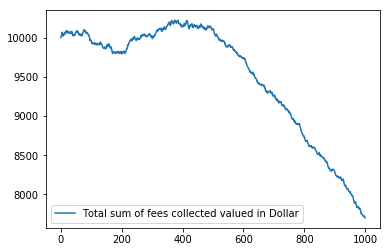

In [80]:
#Current fee consumption drop in ETH and WIZ
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

NrParticipants=100;
Participants=[]
SupplyGNO=1000000000;
CurrentFeesCollected=[10000]
NR_OF_DAYS=1000

LockedGNO=[0]
LockedGNOAtStart=SupplyGNO;
CurrentFeesInWIZ=[7000]
CurrentFeesInETH=[3000]
CurrentFeesCollected=[10000]
SupplyWIZ=[CurrentFeesCollected[0]*43/10]


class Staker(object):
    GNO =0
    isLocked= False
    LockedInDays = 0
    LockingDate=0
    WIZ=0
    lastWIZWithdraw=0
    IssueRate=0

    # The class "constructor" - It's actually an initializer 
    def __init__(self, GNO):
        self.GNO = GNO
    
    def withdrawWIZ(self,today):
        if today>self.lastWIZWithdraw and self.isLocked:
            SupplyWIZ[today]+=(today-self.lastWIZWithdraw)*self.IssueRate
            self.lastWIZWithdraw=today
        
    def checkUnlock(self, today):
        self.withdrawWIZ(today)
        if today>self.LockingDate+self.LockedInDays and self.isLocked:
                LockedGNO[today]-=self.GNO
                self.LockedInDays=0
                self.isLocked= False
                return True;
        return False;    
        
    def lockGNO(self, today):
        global LockedGNOAtStart
        global LockedGNO
        self.checkUnlock(today)
        if not self.isLocked:
            ir=max(0,((CurrentFeesInWIZ[today]+CurrentFeesInETH[today])*12*min(2,CurrentFeesInETH[today]/CurrentFeesInWIZ[today])-SupplyWIZ[today])/30)
            r=random.random()
            if r>0.5:# and ir>(CurrentFeesInWIZ[today])/30: 
                
                LockedGNOAtStart=max(0,LockedGNOAtStart-self.GNO)
                SupplyWIZ[today]+=ir*self.GNO/(self.GNO+LockedGNO[today]+LockedGNOAtStart)*30*1/3
                self.IssueRate=ir*self.GNO/(self.GNO+LockedGNO[today]+LockedGNOAtStart)*2/3
                self.LockedInDays=30
                self.lastWIZWithdraw=today
                self.LockingDate=today
                self.isLocked=True
                LockedGNO[today]+=self.GNO
            
def adjustFees(CurrentDay):
    if CurrentDay <500:    
        CurrentFeesInWIZ.append(CurrentFeesInWIZ[CurrentDay]+((random.random()-1/2)*30))
        if CurrentFeesInWIZ[CurrentDay+1]<0:
            CurrentFeesInWIZ[CurrentDay+1]=1
    
        CurrentFeesInETH.append(CurrentFeesInETH[CurrentDay]+((random.random()-1/2)*30))
        if CurrentFeesInETH[CurrentDay+1]<0:
            CurrentFeesInETH[CurrentDay+1]=1
    else:
        CurrentFeesInWIZ.append(CurrentFeesInWIZ[CurrentDay]-((random.random())*10))
        if CurrentFeesInWIZ[CurrentDay+1]<0:
            CurrentFeesInWIZ[CurrentDay+1]=1
    
        CurrentFeesInETH.append(CurrentFeesInETH[CurrentDay]+((random.random()-1/2)*30))
        if CurrentFeesInETH[CurrentDay+1]<0:
            CurrentFeesInETH[CurrentDay+1]=1
    
            

for i in range(NrParticipants):
     Participants.append( Staker(SupplyGNO/NrParticipants))
    



for CurrentDay in range(NR_OF_DAYS):
    
    for p in Participants:
            p.withdrawWIZ(CurrentDay)
            p.lockGNO(CurrentDay)
    adjustFees(CurrentDay)
    CurrentFeesCollected.append(CurrentFeesInWIZ[CurrentDay+1]+CurrentFeesInETH[CurrentDay+1])   
    SupplyWIZ.append(SupplyWIZ[CurrentDay]-CurrentFeesInWIZ[CurrentDay]/30)
    if SupplyWIZ[CurrentDay+1]<0:
        SupplyWIZ[CurrentDay+1]=1
    LockedGNO.append(LockedGNO[CurrentDay])

    


def two_scales(ax1, time, data1, data2, c1, c2):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    time : array-like
        x-axis values for both datasets

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time (days)')
    ax1.set_ylabel('WIZ supply')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('ratio ETH/WIZ of collected fees')
    return ax1, ax2



# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, range(NR_OF_DAYS+1), SupplyWIZ, np.array(CurrentFeesInETH, dtype=np.float)/np.array(CurrentFeesInWIZ, dtype=np.float), 'g', 'b')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'g')
color_y_axis(ax2, 'b')
plt.title('Supply reaction to ETH/WIZ ratio of paid fees')
plt.show()    
    
    
    
    
    
plt.plot(range(NR_OF_DAYS+1),SupplyWIZ, label='WIZ supply')  
plt.legend()
plt.show()

plt.plot(range(NR_OF_DAYS+1),np.array(CurrentFeesInETH, dtype=np.float)/np.array(CurrentFeesInWIZ, dtype=np.float), label='Fee collection ratio ETH/WIZ') 
plt.legend()
plt.show()


plt.plot(range(NR_OF_DAYS+1),CurrentFeesCollected, label='Total sum of fees collected valued in Dollar') 
plt.legend()
plt.show()


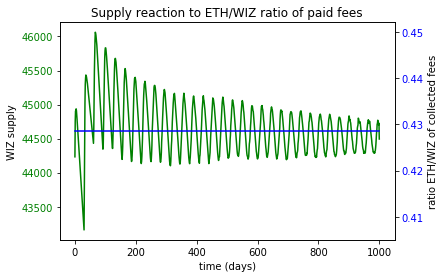

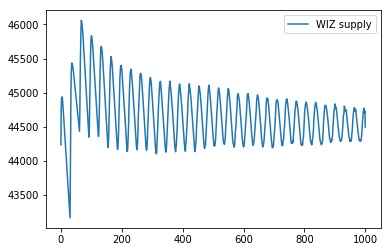

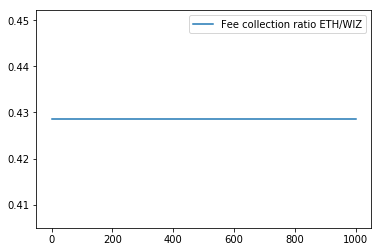

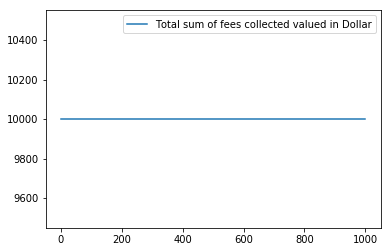

In [99]:
#Current fee consumption drop in ETH and WI
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

NrParticipants=500;
Participants=[]
SupplyGNO=1000000000;
CurrentFeesCollected=[10000]
NR_OF_DAYS=1000

LockedGNO=[0]
LockedGNOAtStart=SupplyGNO;
CurrentFeesInWIZ=[7000]
CurrentFeesInETH=[3000]
CurrentFeesCollected=[10000]
SupplyWIZ=[CurrentFeesCollected[0]*43/10]
    
            
for i in range(NrParticipants):
     Participants.append( Staker(SupplyGNO/NrParticipants))
    

for CurrentDay in range(NR_OF_DAYS):
    
    for p in Participants:
            p.withdrawWIZ(CurrentDay)
            p.lockGNO(CurrentDay)
    adjustFees(CurrentDay)
    CurrentFeesCollected.append(CurrentFeesInWIZ[CurrentDay+1]+CurrentFeesInETH[CurrentDay+1])   
    SupplyWIZ.append(SupplyWIZ[CurrentDay]-CurrentFeesInWIZ[CurrentDay]/30)
    if SupplyWIZ[CurrentDay+1]<0:
        SupplyWIZ[CurrentDay+1]=1
    LockedGNO.append(LockedGNO[CurrentDay])
    
# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, range(NR_OF_DAYS+1), SupplyWIZ, np.array(CurrentFeesInETH, dtype=np.float)/np.array(CurrentFeesInWIZ, dtype=np.float), 'g', 'b')
color_y_axis(ax1, 'g')
color_y_axis(ax2, 'b')
plt.title('Supply reaction to ETH/WIZ ratio of paid fees')
plt.show()    
plt.plot(range(NR_OF_DAYS+1),SupplyWIZ, label='WIZ supply')  
plt.legend()
plt.show()
plt.plot(range(NR_OF_DAYS+1),np.array(CurrentFeesInETH, dtype=np.float)/np.array(CurrentFeesInWIZ, dtype=np.float), label='Fee collection ratio ETH/WIZ') 
plt.legend()
plt.show()
plt.plot(range(NR_OF_DAYS+1),CurrentFeesCollected, label='Total sum of fees collected valued in Dollar') 
plt.legend()
plt.show()    
            
def adjustFees(CurrentDay):
        CurrentFeesInWIZ.append(CurrentFeesInWIZ[CurrentDay])
    
        CurrentFeesInETH.append(CurrentFeesInETH[CurrentDay])
          